In [153]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd 
import numpy as nd 
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

In [154]:
iris = load_iris()
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [155]:
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [156]:
df = df.drop(['sepal length (cm)','sepal width (cm)'],axis='columns')
df.head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


In [157]:
import matplotlib.pyplot as plt

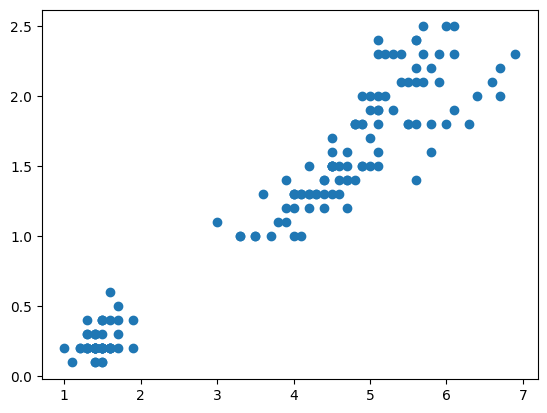

In [158]:
%matplotlib inline
plt.scatter(df['petal length (cm)'],df['petal width (cm)'])

In [159]:
km = KMeans(n_clusters=2)
y_predicted = km.fit_predict(df)

In [160]:
df['cluster'] = y_predicted
df.head()

,petal length (cm),petal width (cm),cluster
0,1.4,0.2,1
1,1.4,0.2,1
2,1.3,0.2,1
3,1.5,0.2,1
4,1.4,0.2,1


In [161]:
scale = MinMaxScaler()
scale.fit(df[['petal length (cm)']])
df['petal length (cm)']=scale.transform(df[['petal length (cm)']])
df.head()

,petal length (cm),petal width (cm),cluster
0,0.067797,0.2,1
1,0.067797,0.2,1
2,0.050847,0.2,1
3,0.084746,0.2,1
4,0.067797,0.2,1


In [162]:
scale.fit(df[['petal width (cm)']])
df['petal width (cm)']=scale.transform(df[['petal width (cm)']])
df.head()

,petal length (cm),petal width (cm),cluster
0,0.067797,0.041667,1
1,0.067797,0.041667,1
2,0.050847,0.041667,1
3,0.084746,0.041667,1
4,0.067797,0.041667,1


In [163]:
km = KMeans(n_clusters=2)
y_predicted=km.fit_predict(df[['petal length (cm)','petal width (cm)']])
df['cluster']=y_predicted

In [164]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]

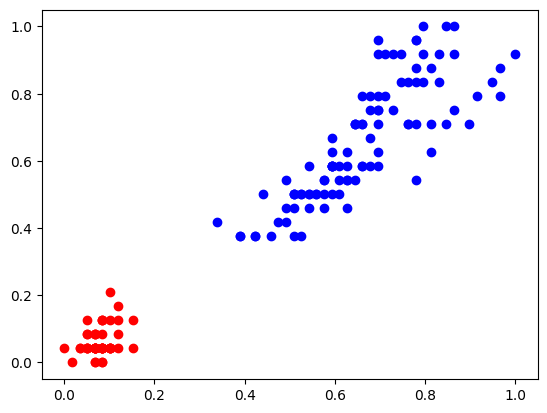

In [165]:
%matplotlib inline
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color='blue')
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'],color='red')

In [166]:
x = range(1,10)
score = []
for a in x:
    km = KMeans(n_clusters=a)
    km.fit(df[['petal length (cm)','petal width (cm)']])
    score.append(km.inertia_)
score

[28.368353219727197,
 5.176463590044368,
 1.701874688192097,
 1.1615234094205573,
 0.8616150173815893,
 0.6795297632254396,
 0.6163602453129818,
 0.5253491965657061,
 0.48733626246015616]

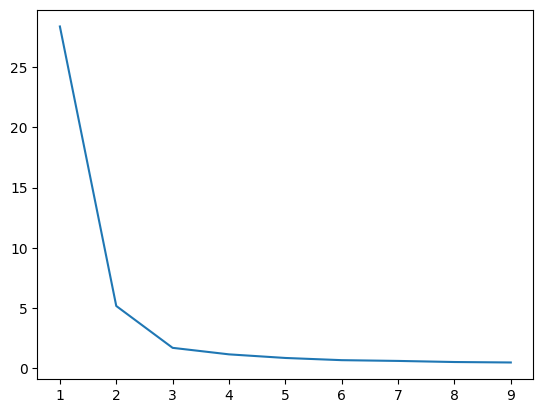

In [167]:
plt.plot(x,score)

In [168]:
km = KMeans(n_clusters=3)
y_predicted=km.fit_predict(df[['petal length (cm)','petal width (cm)']])
df['cluster'] = y_predicted
df.head()

,petal length (cm),petal width (cm),cluster
0,0.067797,0.041667,1
1,0.067797,0.041667,1
2,0.050847,0.041667,1
3,0.084746,0.041667,1
4,0.067797,0.041667,1


In [169]:
km.cluster_centers_

array([[0.55867014, 0.51041667],
       [0.07830508, 0.06083333],
       [0.7740113 , 0.81510417]])

In [170]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

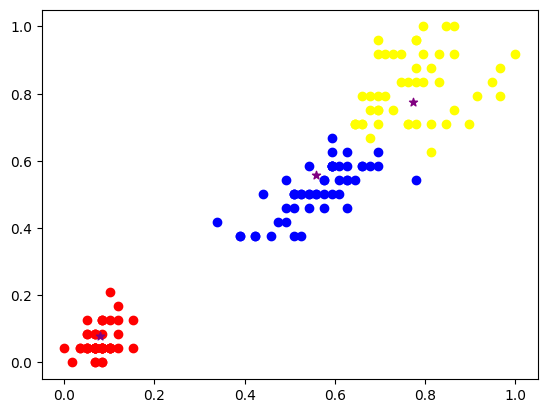

In [171]:
%matplotlib inline
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color='blue')
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'],color='red')
plt.scatter(df3['petal length (cm)'],df3['petal width (cm)'],color='yellow')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,0],marker='*',color='purple')